In [7]:

from pathlib import Path


from duckduckgo_search import DDGS
from fastdownload import download_url
from fastai.interpret import ClassificationInterpretation
from fastai.vision.all import (
  Image,
  download_images,
  resize_images,
  verify_images,
  get_image_files,
  DataBlock,
  ImageBlock,
  CategoryBlock,
  RandomSplitter,
  parent_label,
  Resize,
  resnet18,
  vision_learner,
  error_rate,
  PILImage,
  load_learner
)

dp_images = Path() / "images"
[str(s) for s in dp_images.glob('*') ]


['images/homeless', 'images/not_homeless']

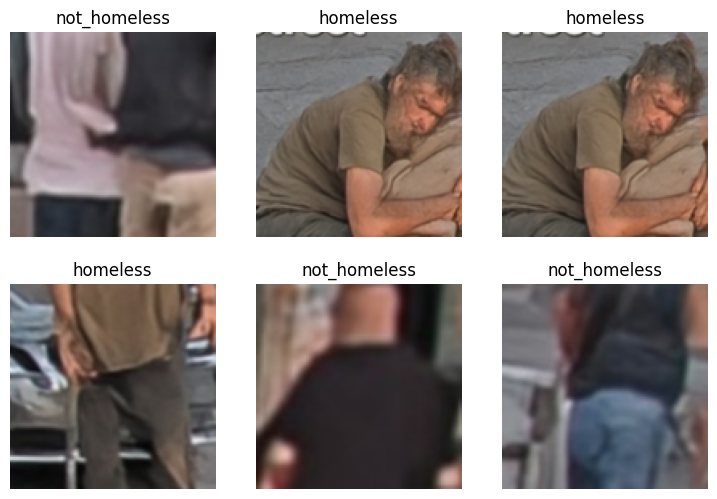

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128, method=Resize)],
).dataloaders(dp_images, bs=32)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.162464,5.537922,0.631579,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.834395,3.914845,0.631579,00:00
1,0.618389,2.308231,0.631579,00:00
2,0.438518,1.131471,0.473684,00:00
3,0.339579,0.459446,0.210526,00:00
4,0.269334,0.095138,0.000000,00:00
5,0.225450,0.018145,0.000000,00:00
6,0.204839,0.005532,0.000000,00:00
7,0.179350,0.002499,0.000000,00:00
8,0.156118,0.001252,0.000000,00:00
9,0.137889,0.000663,0.000000,00:00


In [12]:
learn.export('homeless_classifier.pkl')

In [13]:
new_learn = load_learner('homeless_classifier.pkl')

/Users/shong/Code/online-learnings/2025-06-17-practical-deep-learning-for-coders/.venv/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [14]:
grizzly_bear_image = PILImage.create(dp_images / "homeless" / "person_cytjkkigdny446xsdf2huuww copy 4.jpg")
labels = new_learn.dls.vocab
res, idx, prob = new_learn.predict(grizzly_bear_image)
dict(zip(labels, map(float, prob)))

{'homeless': 1.0, 'not_homeless': 2.485142300279186e-11}